# Identificación de modelo parámetrico.

In [1]:
library(survival)

Warning message:
"package 'survival' was built under R version 3.6.3"

In [2]:
data(rats)

Warning message in data(rats):
"data set 'rats' not found"

In [3]:
names(rats)

[1] "litter" "rx"     "time"   "status" "sex"

**Revisión de NA´s**

In [4]:
sum(is.na(rats))

[1] 0

## Análisis de supervivencia.

In [5]:
supervivencia<-Surv(rats$time, rats$status)

**Modelo Cox.**

In [6]:
cox<-coxph(supervivencia~rats$sex+rats$rx)

In [7]:
summary(cox)

Call:
coxph(formula = supervivencia ~ rats$sex + rats$rx)

  n= 300, number of events= 42 

              coef exp(coef) se(coef)      z Pr(>|z|)    
rats$sexm -3.06769   0.04653  0.72480 -4.232 2.31e-05 ***
rats$rx    0.79100   2.20559  0.30936  2.557   0.0106 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

          exp(coef) exp(-coef) lower .95 upper .95
rats$sexm   0.04653    21.4923   0.01124    0.1926
rats$rx     2.20559     0.4534   1.20281    4.0444

Concordance= 0.764  (se = 0.031 )
Likelihood ratio test= 50.04  on 2 df,   p=1e-11
Wald test            = 24.08  on 2 df,   p=6e-06
Score (logrank) test = 42.68  on 2 df,   p=5e-10


**Residuales.**

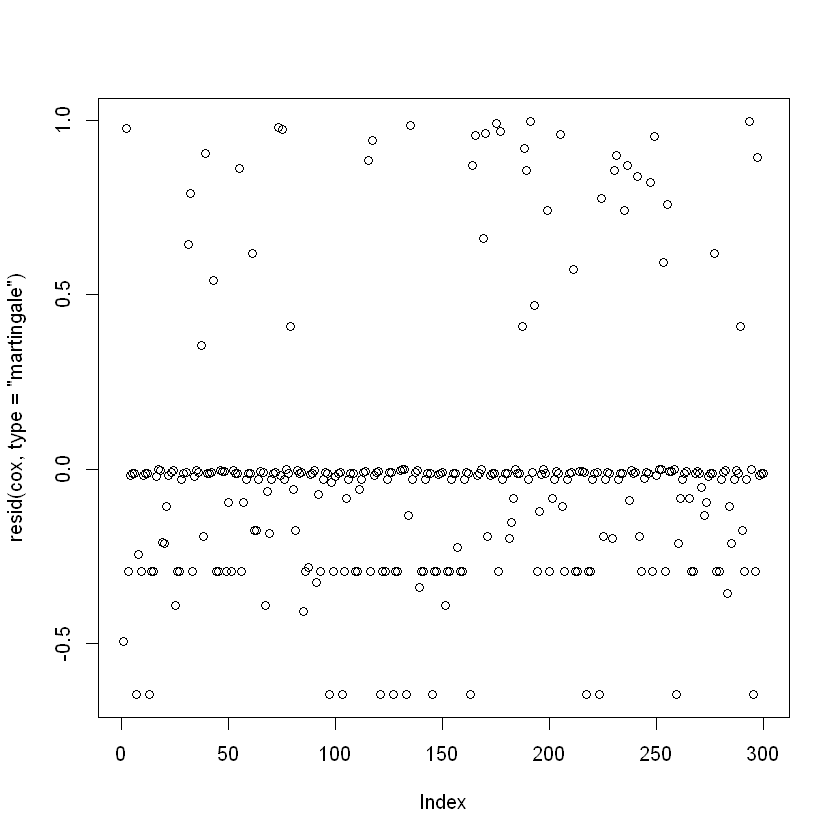

In [8]:
plot(resid(cox, type="martingale"))

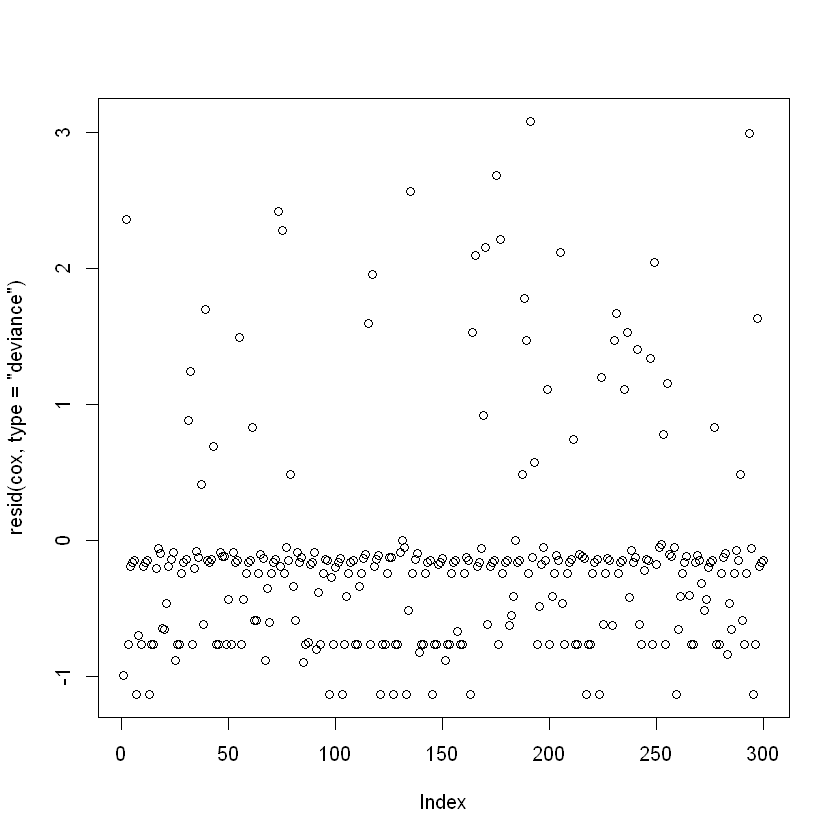

In [9]:
plot(resid(cox, type="deviance"))

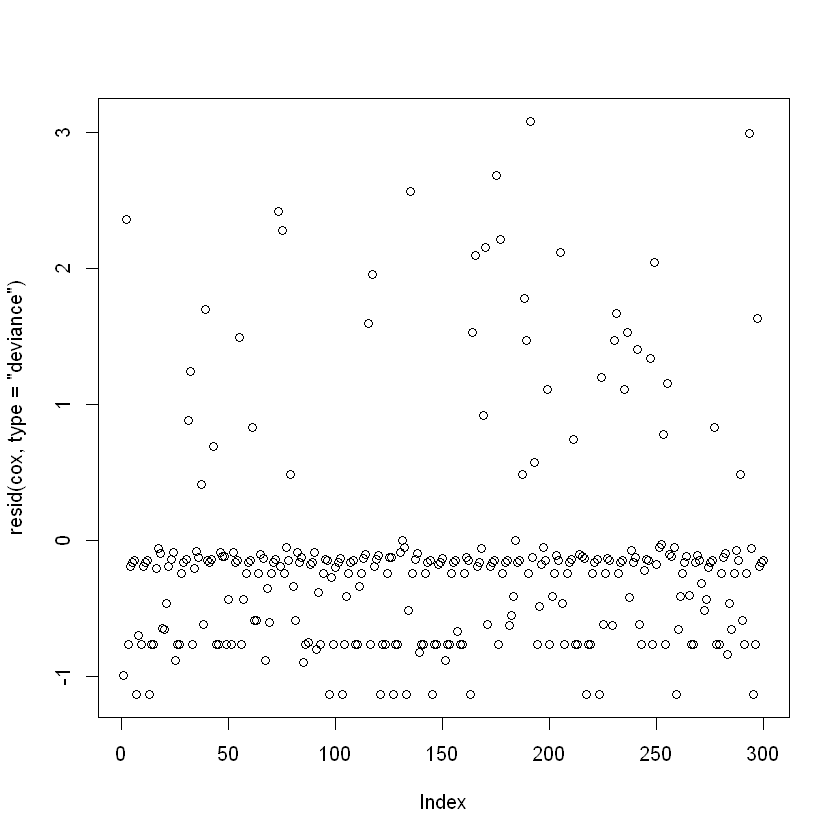

In [10]:
d<-plot(resid(cox, type="deviance"))

In [11]:
d[d>2.8]

NULL

In [12]:
rats2<-rats[-c(191, 293),]

In [13]:
supervivencia2<-Surv(rats2$time, rats2$status)

In [14]:
cox2<-coxph(supervivencia2~rats2$rx)

In [15]:
summary(cox2)

Call:
coxph(formula = supervivencia2 ~ rats2$rx)

  n= 298, number of events= 40 

           coef exp(coef) se(coef)     z Pr(>|z|)  
rats2$rx 0.8099    2.2477   0.3168 2.556   0.0106 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

         exp(coef) exp(-coef) lower .95 upper .95
rats2$rx     2.248     0.4449     1.208     4.182

Concordance= 0.578  (se = 0.041 )
Likelihood ratio test= 6.45  on 1 df,   p=0.01
Wald test            = 6.54  on 1 df,   p=0.01
Score (logrank) test = 6.9  on 1 df,   p=0.009


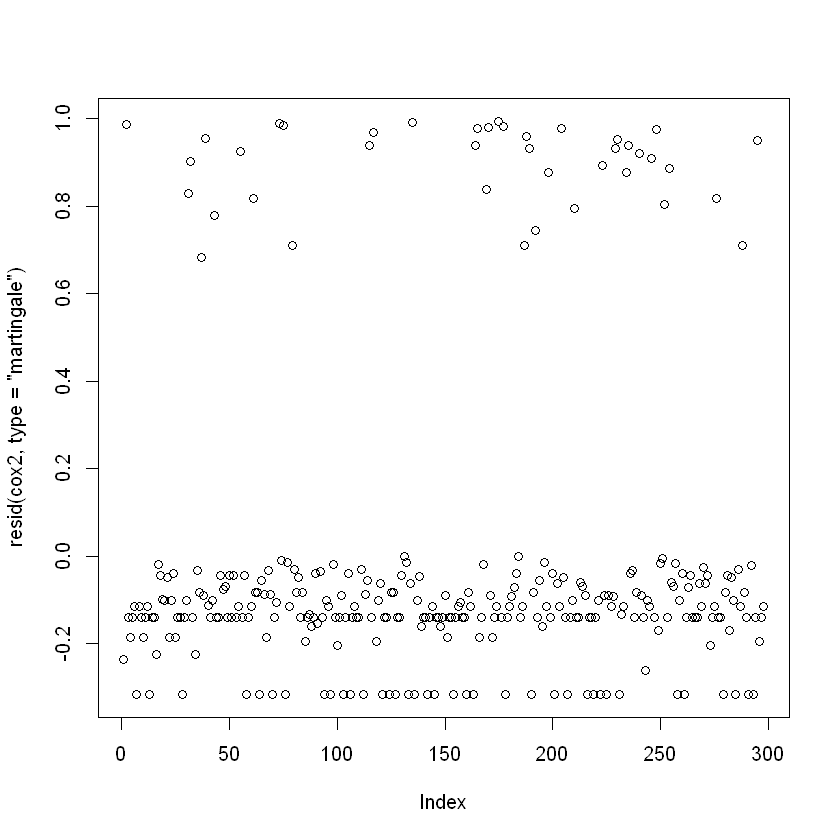

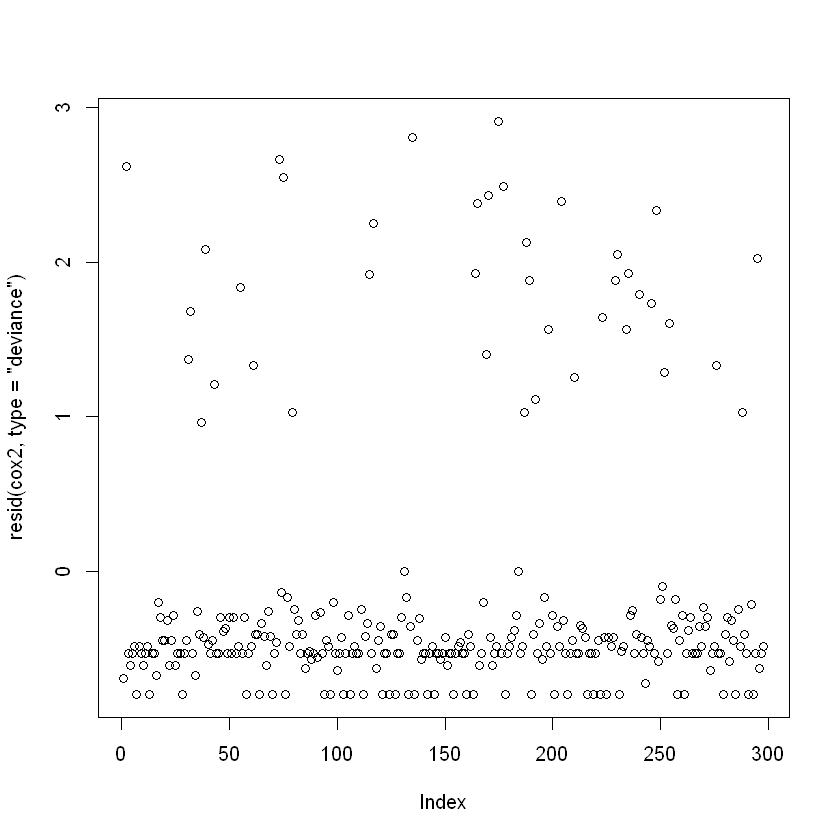

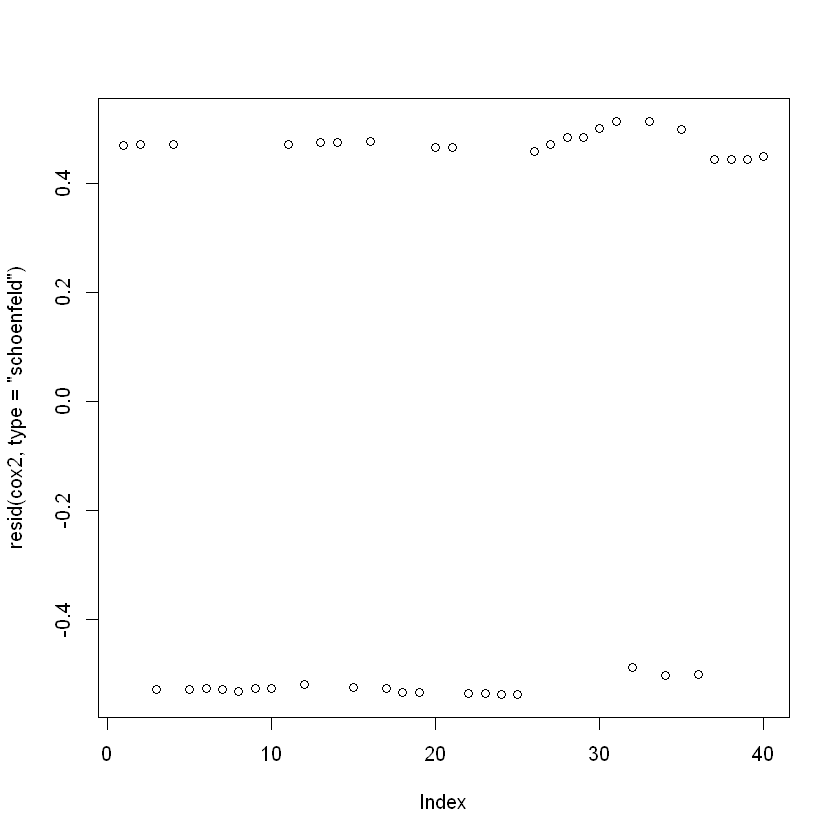

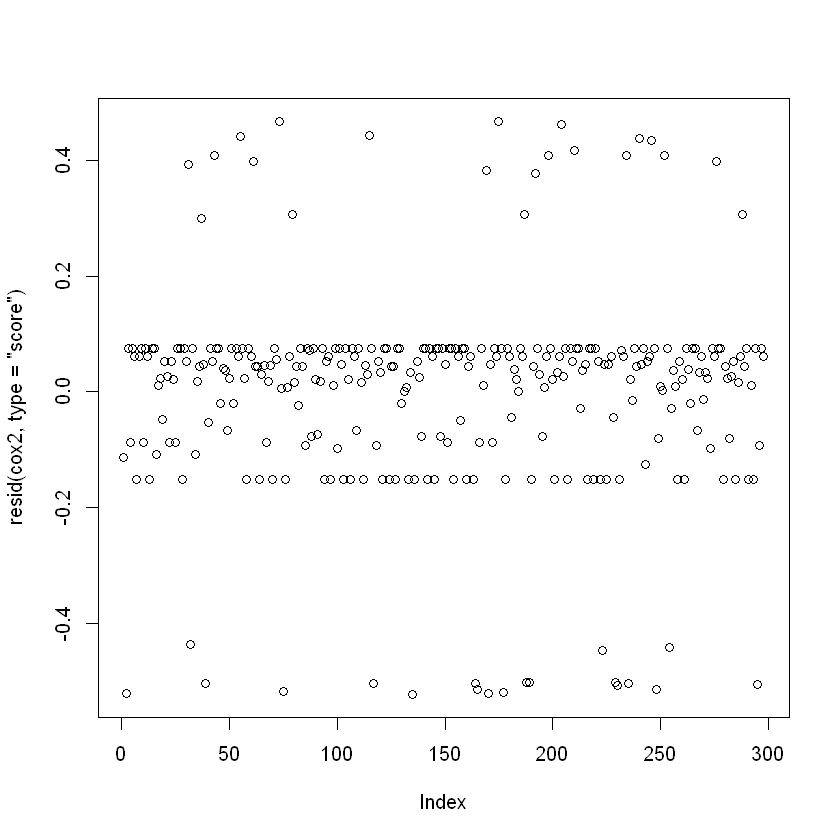

In [16]:
plot(resid(cox2, type="martingale"))
plot(resid(cox2, type="deviance"))
plot(resid(cox2, type="schoenfeld"))
plot(resid(cox2, type="score"))

## Modelo paramétrico

In [17]:
supervivencia.estimada<-survfit(cox2)

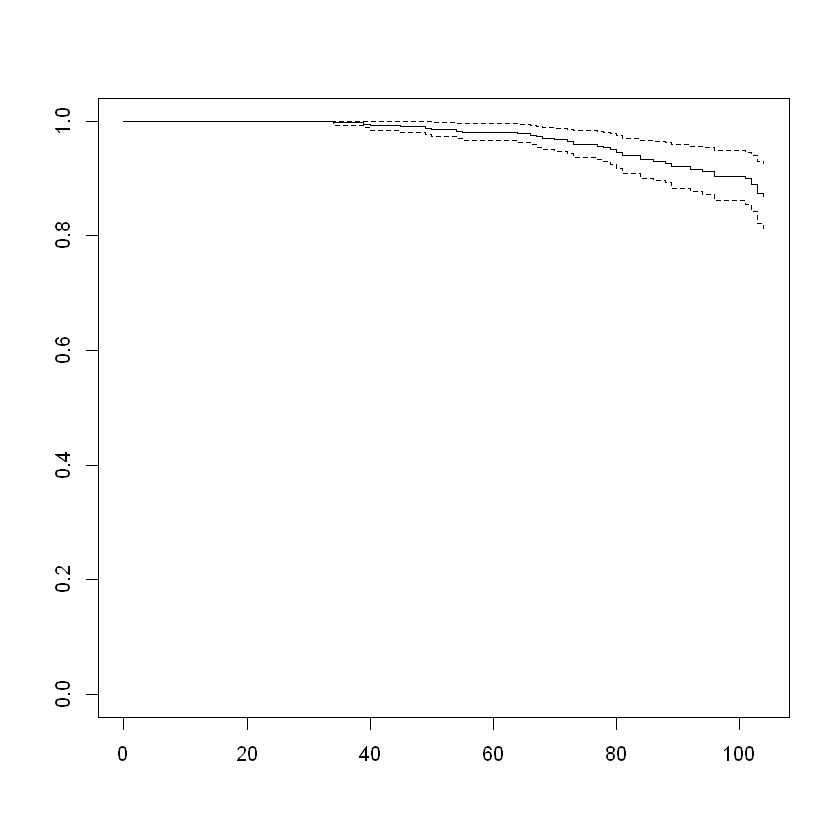

In [18]:
plot(supervivencia.estimada)

In [19]:
summary(supervivencia.estimada)

Call: survfit(formula = cox2)

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
   34    296       1    0.998 0.00241        0.993        1.000
   39    295       1    0.995 0.00346        0.988        1.000
   40    293       1    0.993 0.00429        0.984        1.000
   45    292       1    0.990 0.00502        0.981        1.000
   49    290       1    0.988 0.00569        0.977        0.999
   50    288       1    0.986 0.00631        0.973        0.998
   54    283       1    0.983 0.00691        0.970        0.997
   55    280       1    0.981 0.00749        0.966        0.995
   64    272       1    0.978 0.00808        0.962        0.994
   66    269       1    0.976 0.00865        0.959        0.993
   67    268       1    0.973 0.00920        0.955        0.991
   68    265       1    0.970 0.00974        0.951        0.990
   70    261       1    0.968 0.01028        0.948        0.988
   72    258       1    0.965 0.01082        0.944        0.987
   73    

In [20]:
supervivencia.solo<-supervivencia.estimada$surv

In [21]:
tiempo.solo<-supervivencia.estimada$time

In [22]:
riesgo<-rep(0, length(supervivencia.solo))

In [23]:
for(i in 2: length(supervivencia.solo))
    {riesgo[i]<-(supervivencia.solo[i-1]-supervivencia.solo[i])/supervivencia.solo[i]}

In [24]:
riesgo<-riesgo[-1]
tiempo.solo<-tiempo.solo[-1]

*Riesgo verdadero* (porque se le quito el 1)

In [25]:
riesgo

[1] 0.000000000 0.002386499 0.002399370 0.002418214 0.002424076 0.002443311
 [7] 0.002462854 0.000000000 0.000000000 0.002501343 0.002520255 0.000000000
[13] 0.000000000 0.000000000 0.002605562 0.000000000 0.002634722 0.002641682
[19] 0.002689592 0.000000000 0.002718843 0.000000000 0.002750609 0.005571107
[25] 0.000000000 0.000000000 0.000000000 0.002893811 0.002964568 0.003002375
[31] 0.006150157 0.006282858 0.000000000 0.000000000 0.006566347 0.000000000
[37] 0.003351929 0.000000000 0.003507577 0.007253566 0.000000000 0.000000000
[43] 0.004117313 0.000000000 0.004331141 0.000000000 0.009309726 0.000000000
[49] 0.000000000 0.000000000 0.000000000 0.005091655 0.010480090 0.018704132
[55] 0.006455209

**Gráficas**
*Revisando gráficas para sugerencia de familia.* 

**Familia exponencial**

In [29]:
regresion<-lm(riesgo~tiempo.solo)

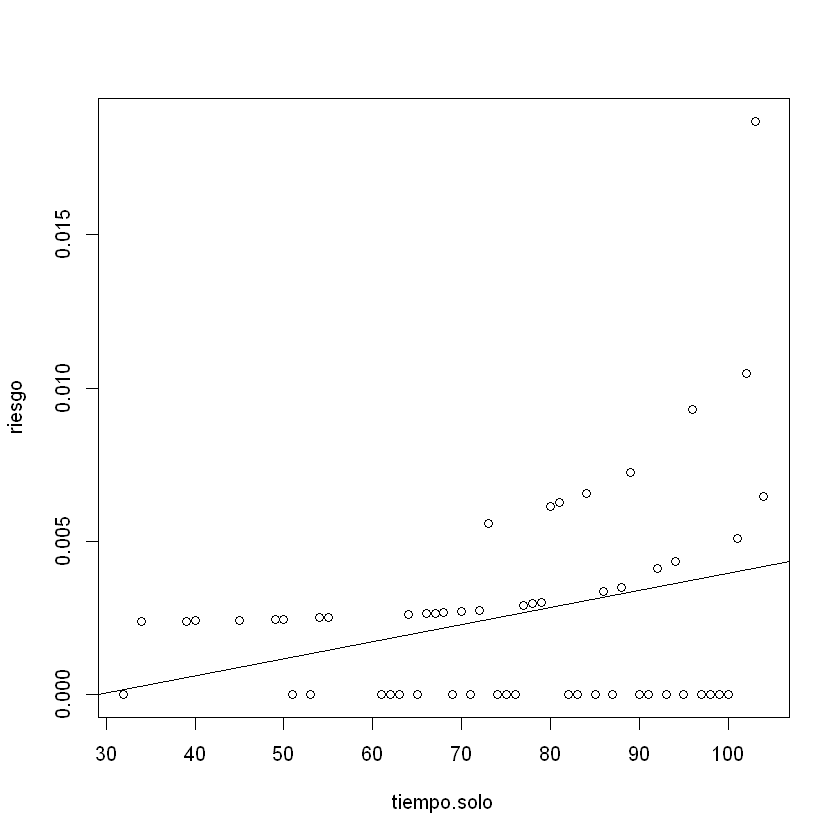

In [30]:
plot(tiempo.solo, riesgo)
abline(regresion)

In [31]:
summary(regresion)


Call:
lm(formula = riesgo ~ tiempo.solo)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0039616 -0.0025401  0.0002149  0.0013065  0.0145754 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) -1.613e-03  1.806e-03  -0.893   0.3760  
tiempo.solo  5.574e-05  2.331e-05   2.391   0.0204 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.003274 on 53 degrees of freedom
Multiple R-squared:  0.09735,	Adjusted R-squared:  0.08032 
F-statistic: 5.716 on 1 and 53 DF,  p-value: 0.02039


**Familia Weibull**

In [ ]:
supervivencia.solo<-supervivencia.solo[-1]

In [ ]:
plot(tiempo.solo, -log(supervivencia.solo), xlim=c(0, 120), ylim=c(0,1))

In [ ]:
weibull<-lm(-log(supervivencia.solo)~tiempo.solo)

In [ ]:
abline(weibull)

*La gráfica no pasa por el origen, esto se puede afirmar en el summary al ver el intercepto*

In [ ]:
summary(weibull)

In [ ]:
plot(log(tiempo.solo), log(-log(supervivencia.solo)))

In [ ]:
weibull2<-lm(log(-log(supervivencia.solo))[c(-1, -2)]~log(tiempo.solo)[c(-1, -2)])

In [ ]:
abline(weibull2)

In [ ]:
summary(weibull2)

*Parece indicar que es una Weibull*

**Familia lognormal**

*inversa de la norma estandar qnorm*

In [ ]:
plot(log(tiempo.solo), qnorm(1-supervivencia.solo))

In [ ]:
lognormal<-lm(qnorm(1-supervivencia.solo)[c(-1, -2)]~log(tiempo.solo)[c(-1, -2)])

In [ ]:
abline(lognormal)

In [ ]:
summary(lognormal)

*Aqui ya da sugerencia de modelo lognormal*

**Familia Loglogistica**

*logit(p)=log(log(p/(1-p)))*

In [ ]:
plot(log(tiempo.solo), qlogis(supervivencia.solo))

In [ ]:
loglogit<-lm(qlogis(supervivencia.solo)[c(-1, -2)]~log(tiempo.solo)[c(-1, -2)])

In [ ]:
abline(loglogit)

In [ ]:
summary(loglogit)

In [32]:
library(flexsurv)

Warning message:
"package 'flexsurv' was built under R version 3.6.3"

In [35]:
exponencial<-flexsurv::flexsurvreg(supervivencia2~rats2$rx, dist="exp")

In [36]:
exponencial<-flexsurv::flexsurvreg(supervivencia2~rats2$rx, dist="exponencial")

ERROR: Error in match.arg(tolower(dist), tolower(names(flexsurv.dists))): 'arg' should be one of "genf", "genf.orig", "gengamma", "gengamma.orig", "exp", "weibull", "weibullph", "lnorm", "gamma", "gompertz", "llogis", "exponential", "lognormal"
